## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [69]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own. 

In [70]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [71]:
df.shape

(19622, 160)

In [72]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

In [73]:
df.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [74]:
df.classe.unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [75]:
df_sum_null = df.isnull().sum()
df_sum_null[df_sum_null > 0]

kurtosis_roll_belt      19216
kurtosis_picth_belt     19216
kurtosis_yaw_belt       19216
skewness_roll_belt      19216
skewness_roll_belt.1    19216
                        ...  
stddev_pitch_forearm    19216
var_pitch_forearm       19216
avg_yaw_forearm         19216
stddev_yaw_forearm      19216
var_yaw_forearm         19216
Length: 100, dtype: int64

We can see that there is 100 columns with missing values

In [76]:
df_sum_null[df_sum_null > 0].unique()

array([19216], dtype=int64)

We can also see that all the columns with missing values have the same number of missing values

2). Get rid of the columns that have more than 97% missing values.

In [77]:
treshhold = 0.97 * df.shape[0]
for column in df.columns:
    if df[column].isnull().sum() > treshhold:
        df.drop(column, axis=1, inplace=True)

In [78]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_f

3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [79]:
# we don't need the index column
df.drop("Unnamed: 0", axis=1, inplace=True)

#we don't need the username
df.drop("user_name", axis=1, inplace=True)

# removing columns with time in in their name
time_columns = [col for col in df.columns if 'time' in col]
df.drop(time_columns, axis=1, inplace=True)

# num_window and new_window are time related columns
df.drop(["num_window", "new_window"], axis=1, inplace=True)

In [82]:
df.columns

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

In [83]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
df.columns.difference(num_col)

Index(['classe'], dtype='object')

'classe' is the only non-numeric feature, we need to encode it

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [84]:
le = preprocessing.LabelEncoder()
le.fit_transform(df["classe"])
df["classe"] = le.transform(df["classe"])

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [85]:
df_target = df["classe"]
df_data = df.drop("classe", axis=1)
x_columns = df_data.columns

# scaling the data
df_data = preprocessing.MinMaxScaler().fit_transform(df_data)

df_data = pd.DataFrame(df_data, columns=x_columns)
df= pd.concat([df_data, df_target], axis=1)

df.head()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,0.158774,0.550129,0.23844,0.103448,0.319018,0.500000,0.467532,0.482927,0.313305,0.781579,...,0.848286,0.022074,0.033753,0.707692,0.536977,0.313433,0.647029,0.652357,0.702375,0
1,0.158774,0.550129,0.23844,0.103448,0.325153,0.500000,0.467532,0.478049,0.313305,0.781579,...,0.847901,0.022074,0.033753,0.707692,0.536977,0.312076,0.646516,0.655303,0.700921,0
2,0.158827,0.550129,0.23844,0.103448,0.319018,0.500000,0.467532,0.487805,0.317597,0.784211,...,0.848286,0.022011,0.033837,0.711795,0.537621,0.316147,0.646516,0.654040,0.698982,0
3,0.159141,0.549957,0.23844,0.103448,0.325153,0.500000,0.464286,0.478049,0.309013,0.778947,...,0.847901,0.022011,0.033837,0.704615,0.538907,0.314790,0.647541,0.654040,0.698982,0
4,0.159141,0.550129,0.23844,0.103448,0.325153,0.515625,0.467532,0.482927,0.304721,0.786842,...,0.847901,0.022074,0.033753,0.704615,0.538907,0.314790,0.647029,0.652778,0.700921,0


6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

# we are dealing with a multi-class classification

we use the k-cross validation to compare our models

In [86]:
from sklearn import model_selection

models = {
	'KNN': KNeighborsClassifier(),
	'Decision Tree': DecisionTreeClassifier(),
	'Random Forest': RandomForestClassifier(),
	'AdaBoost': AdaBoostClassifier(),
	#'Gradient Boosting': GradientBoostingClassifier(),
	# if you want to run gradient boosting, uncomment the above line and comment the below line
	# however, gradient boosting takes a lot of time to run
	# its results are not as good as the ones of the other models
	# accuracy = 0.964070 std = 0.003750
	'XGBoost': XGBClassifier(eval_metric="mlogloss")
	
}

results = []

for name in models:
	print("%s Running..." % name)
	kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)
	cv_results = model_selection.cross_val_score(models[name], df_data, df_target, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	print("\t mean_accuracy = %f" % cv_results.mean())
	print("\t std = %f" % cv_results.std())

KNN Running...
	 mean_accuracy = 0.961930
	 std = 0.003864
Decision Tree Running...
	 mean_accuracy = 0.960860
	 std = 0.003763
Random Forest Running...
	 mean_accuracy = 0.995515
	 std = 0.001584
AdaBoost Running...
	 mean_accuracy = 0.715522
	 std = 0.016787
XGBoost Running...


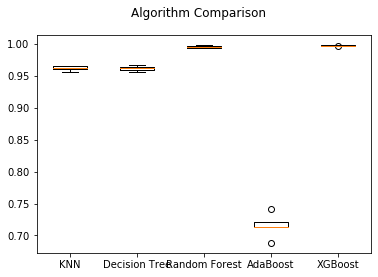

In [ ]:
names = list(models.keys())

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

we can see that random forest is the best model, we will try ot tune parameters of the two of the best models and keep the one wihch performs better

In [ ]:
x_train, x_test, y_train,  y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

In [ ]:
# I did not test a lot of parameters in purpose to reduce execution time during the exam
params = {
    'bootstrap': [True],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10]
}

rf = RandomForestClassifier()
gcv = GridSearchCV(rf, params, scoring='accuracy', refit=True, n_jobs=-1, verbose =3)

gcv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   53.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   53.3s finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10]},
             scoring='accuracy', verbose=3)

In [ ]:
best_params = gcv.best_params_
for p in best_params:
  print("%s : %s" % (p, best_params[p]))

bootstrap : True
min_samples_leaf : 3
min_samples_split : 8
